<a href="https://colab.research.google.com/github/prog815/abscur_prediction/blob/master/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%BD%D0%B0_%D0%B3%D1%80%D0%B0%D1%84%D0%B5_%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B0%D0%B1%D1%81%D0%BE%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D1%85_%D0%B2%D0%B0%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D1%85_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Корреляции на графе относительных изменений абсолютных валютных курсов**

**Абсолютный курс**

Енин А.В.

г. Оренбург

2020 г.

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте -  https://vk.com/abscur

Одноклассники -  https://ok.ru/group/53547043520717

FB -  https://www.facebook.com/abscur 

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur_prediction

Анализируем корреляцию относительных изменений абсолютных валютных курсов. Смотрим как они связаны.

# Библиотеки

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Импорт данных

Таблица с историей абсолютных курсов: https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/edit#gid=422799220

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/export?format=csv&id=1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs&gid=422799220'
abs_data = pd.read_csv(data_url,decimal=',',parse_dates=True,index_col=0)
abs_data.shape

(1296, 45)

## Подготовка данных

In [0]:
dates = abs_data.index.values # даты
cur_names = abs_data.columns.values # имена валют
data = abs_data.values # матрица абсолютных курсов
d_data = np.zeros_like(data) # матрица относительных изменений
d_data[1:,:] = (data[1:,:]-data[:-1,:])/data[:-1,:] # расчет матрицы относительных изменений

# Считаем корреляции

In [0]:
d_corr = np.corrcoef(d_data.T)

# Выводим

показываем только корреляции более 0.6 по модулю

usd hkd 0.987626496927098
czk eur 0.6444618307472504
aed hkd 0.98751592787779
aed usd 0.9998788429529244
dkk eur 0.8040706462456924
dkk czk 0.7125768882343281
huf eur 0.6088461868268361
huf czk 0.7056435206593439
huf dkk 0.6898844229969245
kwd hkd 0.9303913331857576
kwd usd 0.9431528141610696
kwd aed 0.9430414772476172
myr hkd 0.6090266506828291
myr usd 0.6124578213614101
myr aed 0.6123310532258985
myr kwd 0.6167180487563465
pln czk 0.6787776152350965
pln dkk 0.605216641968362
pln huf 0.7375169191055122
ron eur 0.7255645451663373
ron czk 0.6777481126315773
ron dkk 0.8031267062341564
ron huf 0.6682888834367253
ron pln 0.6305915036735513
sar hkd 0.9865712850998206
sar usd 0.9991021814146296
sar aed 0.9989844422211724
sar kwd 0.9427245759889769
sar myr 0.6108136375467204
vnd hkd 0.916938202597158
vnd usd 0.9280149846964704
vnd aed 0.9281482638656525
vnd kwd 0.8871606441355524
vnd sar 0.9284253168200427


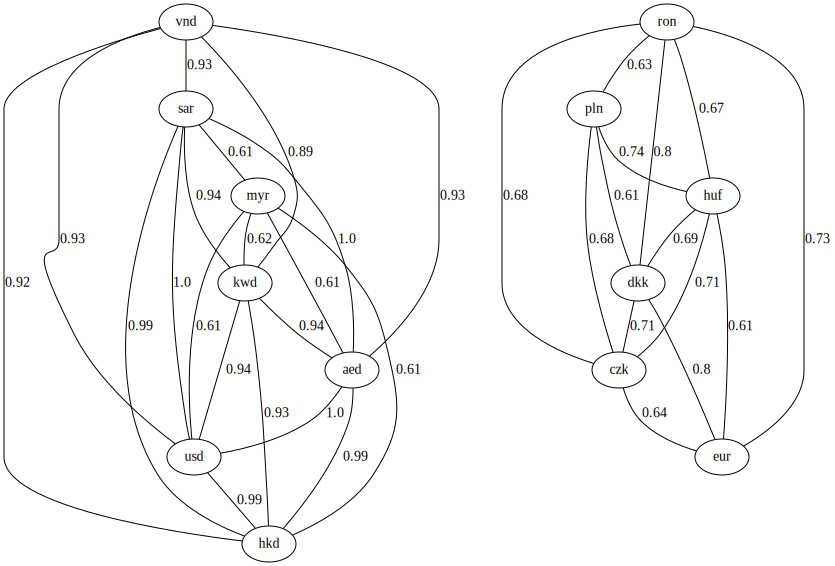

In [27]:
from graphviz import Graph
g = Graph()
for i in range(len(cur_names)):
    for j in range(i):
        ni = cur_names[i]
        nj = cur_names[j]
        cij = d_corr[i,j]
        if abs(cij) > 0.6:
            print(ni,nj,d_corr[i,j])
            g.edge(ni,nj,str(np.round(d_corr[i,j],2)))
g

На диаграмме можно видеть как валюты разделились на две группы. Одна вокруг доллара США, другая около Евро.